In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('goldstock.csv')

In [5]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [15]:
import matplotlib.pyplot as plt

## 1. Time Series Analysis

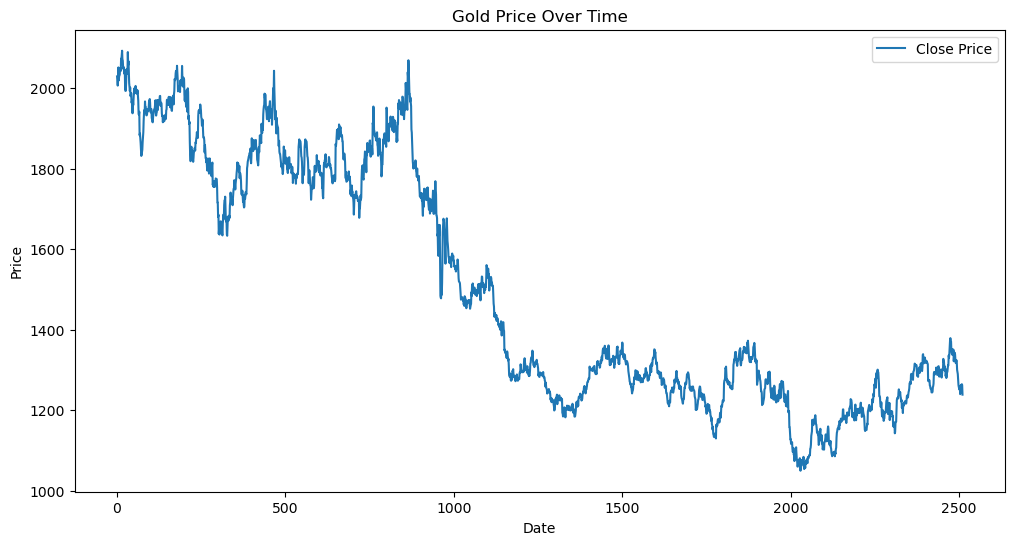

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

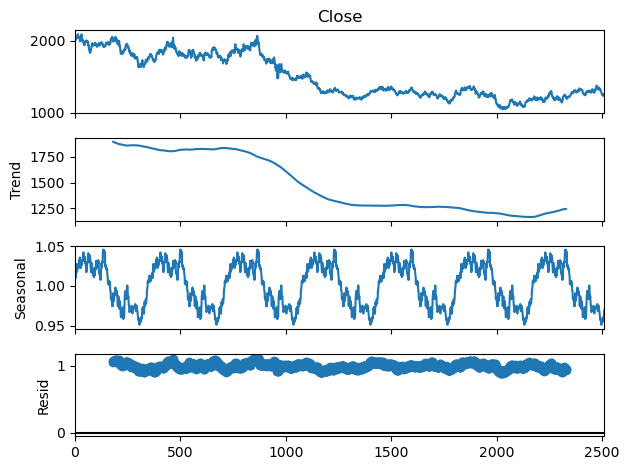

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365) # assuming daily data with yearly seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


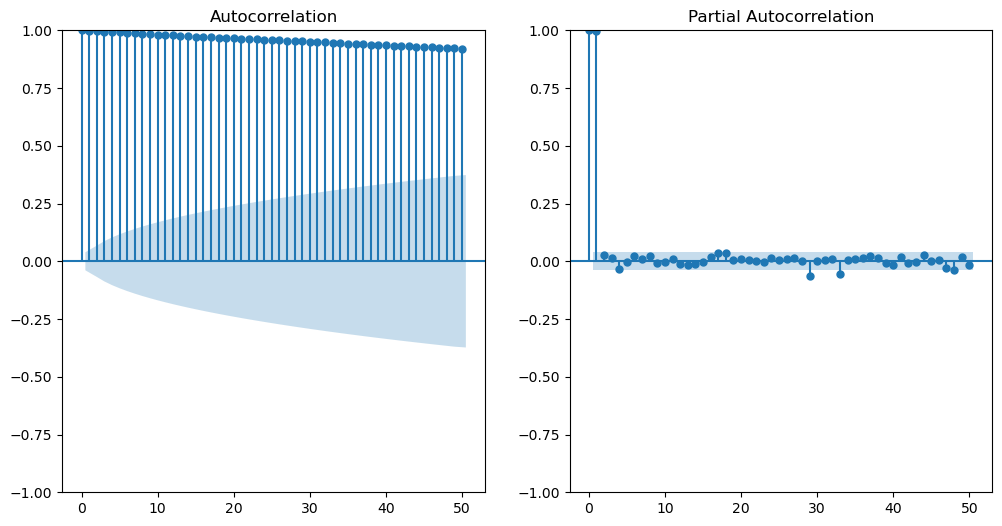

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Close'], lags=50, ax=plt.gca())
plt.subplot(122)
plot_pacf(df['Close'], lags=50, ax=plt.gca())
plt.show()

In [21]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(df['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Interpretation
if result[1] > 0.05:
    print("Series is non-stationary")
else:
    print("Series is stationary")


ADF Statistic: -1.7172755789704768
p-value: 0.4222342775667287
Series is non-stationary


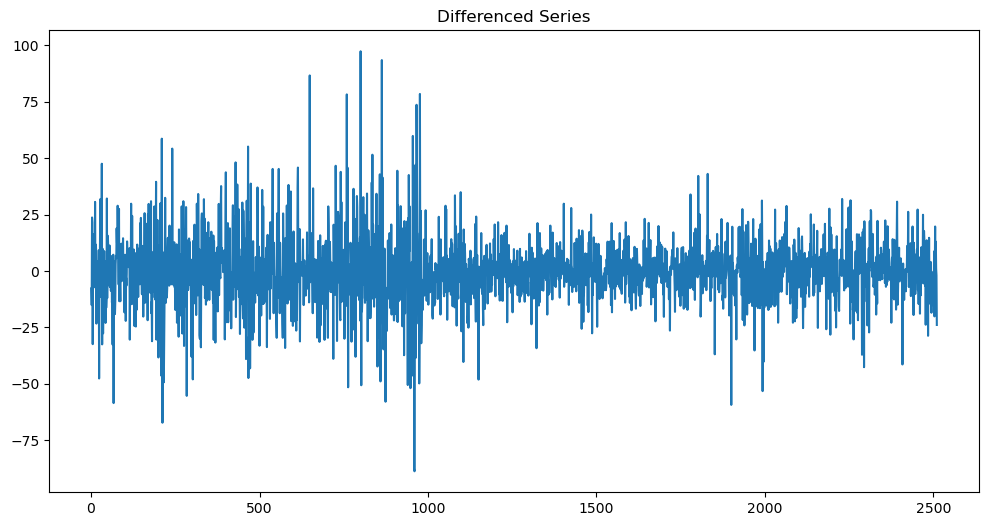

In [22]:
# Differencing to remove trend and make the series stationary
df['Close_diff'] = df['Close'].diff().dropna()

# Plot differenced series
plt.figure(figsize=(12, 6))
plt.plot(df['Close_diff'])
plt.title('Differenced Series')
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2511
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -10300.253
Date:                Wed, 26 Jun 2024   AIC                          20612.507
Time:                        01:59:30   BIC                          20647.475
Sample:                             0   HQIC                         20625.199
                               - 2511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0291      0.016     -1.868      0.062      -0.060       0.001
ar.L2         -0.0068      0.014     -0.482      0.630      -0.034       0.021
ar.L3          0.0292      0.017      1.765      0.0

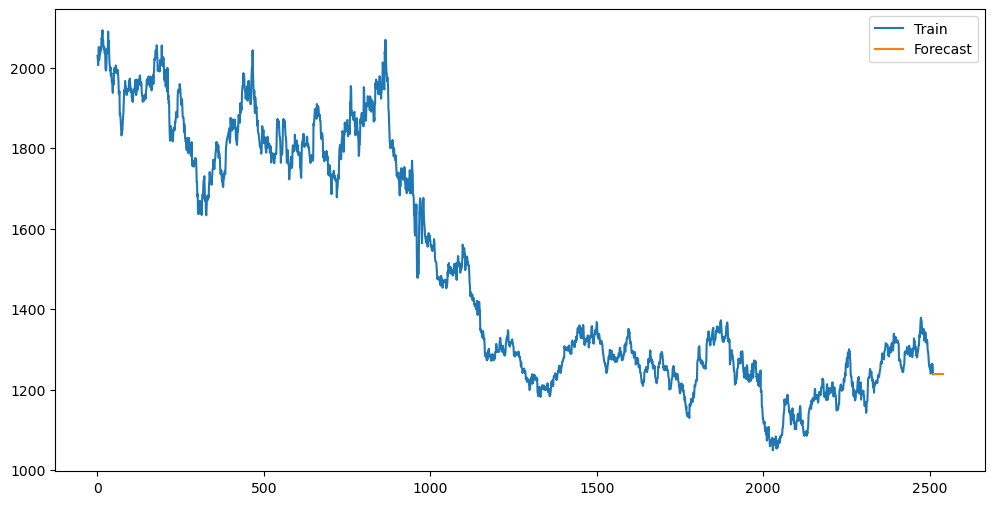

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
model = ARIMA(df['Close'], order=(5, 1, 0)) # Adjust the order based on ACF/PACF plots
model_fit = model.fit()
print(model_fit.summary())

# Forecasting
forecast = model_fit.forecast(steps=30) # Forecast next 30 days
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Train')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


## 2. Advanced Modeling:

In [26]:
import numpy as np

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [30]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

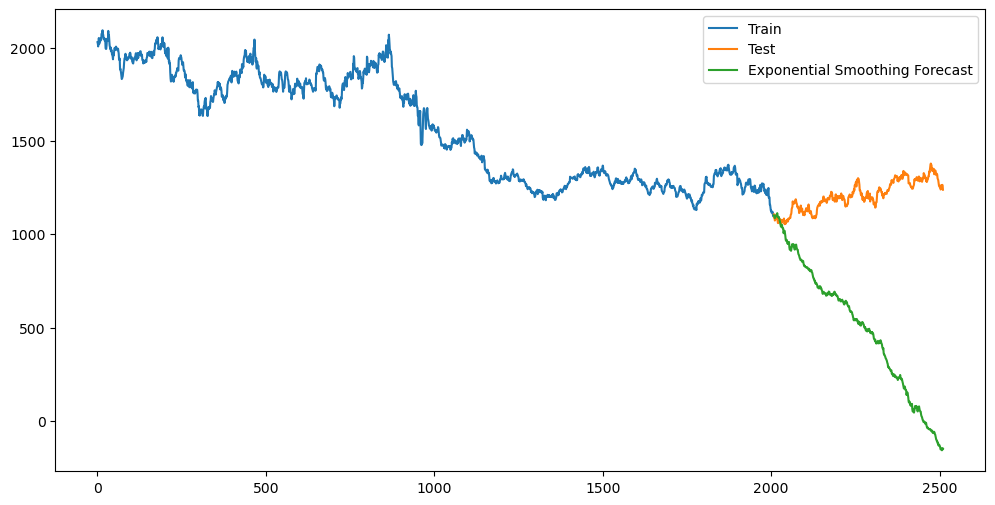

Exponential Smoothing RMSE: 828.2528581482135


In [31]:
# Exponential Smoothing model
model_es = ExponentialSmoothing(train['Close'], trend='add', seasonal='add', seasonal_periods=365)
fit_es = model_es.fit()

# Forecast
forecast_es = fit_es.forecast(len(test))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(forecast_es, label='Exponential Smoothing Forecast')
plt.legend()
plt.show()

# Evaluation
rmse_es = np.sqrt(((forecast_es - test['Close']) ** 2).mean())
print(f'Exponential Smoothing RMSE: {rmse_es}')

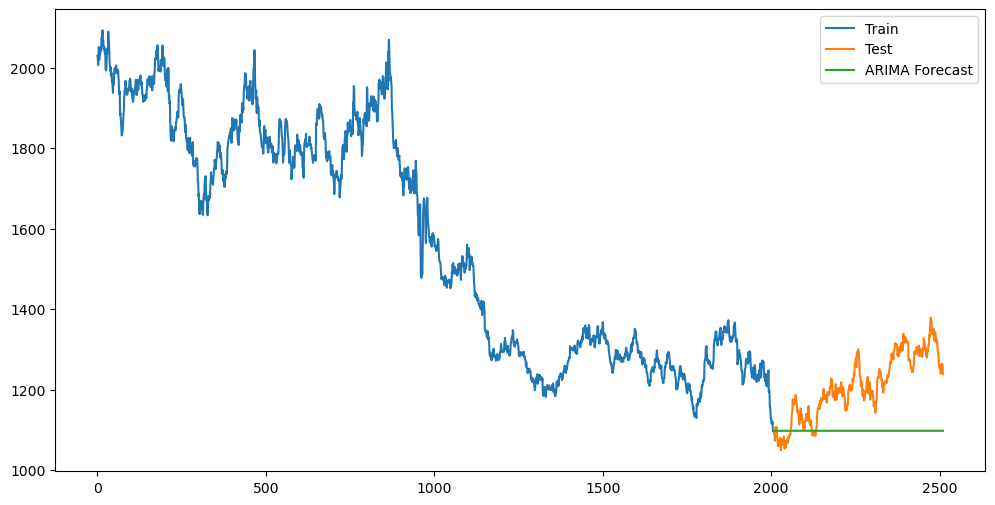

ARIMA RMSE: 135.87678712286626


In [32]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA model
model_arima = ARIMA(train['Close'], order=(5, 1, 0))
fit_arima = model_arima.fit()

# Forecast
forecast_arima = fit_arima.forecast(steps=len(test))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.show()

# Evaluation
rmse_arima = np.sqrt(((forecast_arima - test['Close']) ** 2).mean())
print(f'ARIMA RMSE: {rmse_arima}')


In [36]:
from sklearn.ensemble import RandomForestRegressor


In [37]:
for lag in range(1, 6):
    df[f'lag_{lag}'] = df['Close'].shift(lag)

df.dropna(inplace=True)


In [38]:
X = df.drop(['Close'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


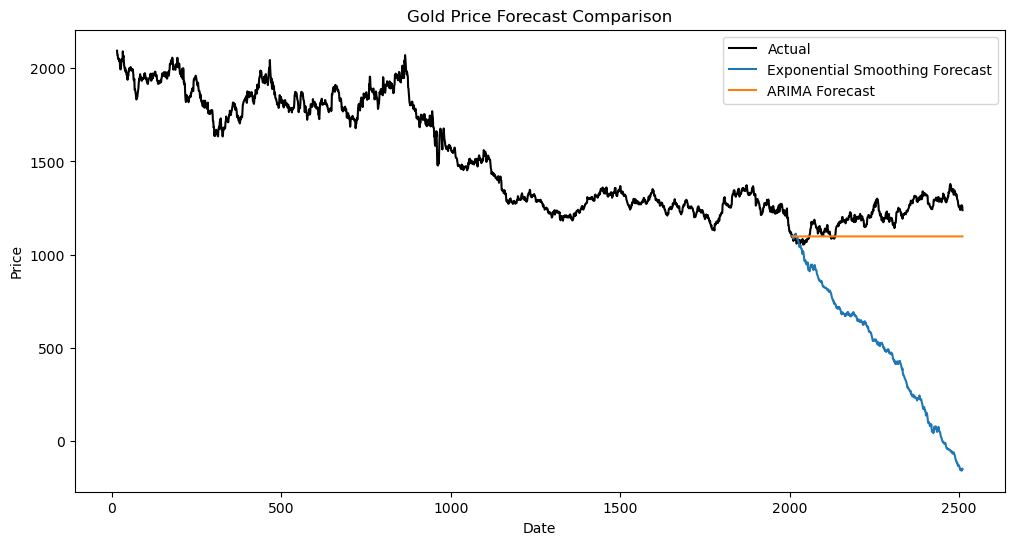

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Actual', color='black')
plt.plot(test.index, forecast_es, label='Exponential Smoothing Forecast')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.title('Gold Price Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 3. Trading Strategy Development:

C:\Users\Suchiitra Sahoo\AppData\Local\Temp\ipykernel_10356\2843824584.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Reverse_Signal'][short_window:] = np.where(df['Short_MA'][short_window:] < df['Long_MA'][short_window:], 1.0, 0.0)


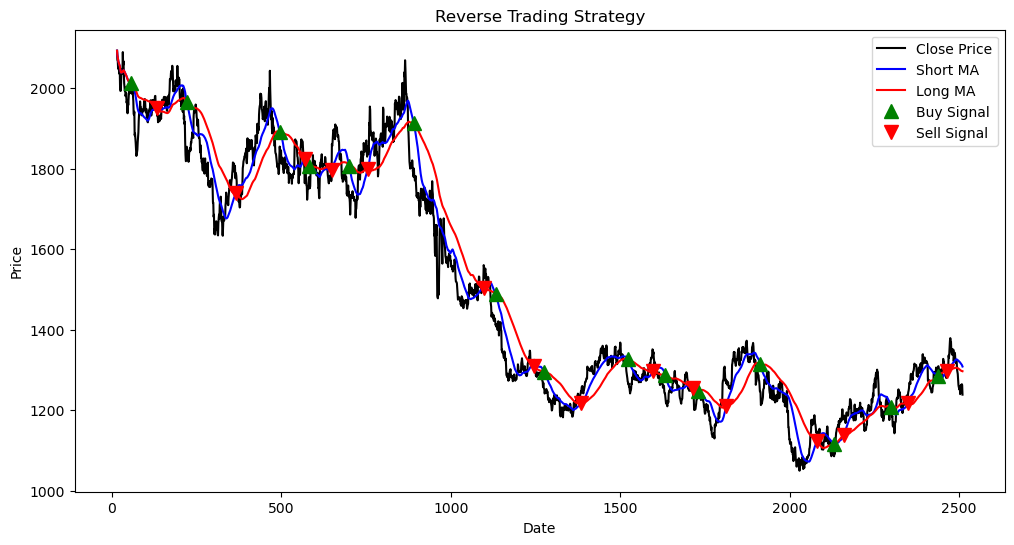

In [45]:
# Reverse trading signals
df['Reverse_Signal'] = 0.0
df['Reverse_Signal'][short_window:] = np.where(df['Short_MA'][short_window:] < df['Long_MA'][short_window:], 1.0, 0.0)
df['Reverse_Position'] = df['Reverse_Signal'].diff()

# Plot the moving averages with reverse buy/sell signals
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='black')
plt.plot(df['Short_MA'], label='Short MA', color='blue')
plt.plot(df['Long_MA'], label='Long MA', color='red')

# Plot reverse buy signals
plt.plot(df[df['Reverse_Position'] == 1].index, df['Short_MA'][df['Reverse_Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
# Plot reverse sell signals
plt.plot(df[df['Reverse_Position'] == -1].index, df['Short_MA'][df['Reverse_Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')

plt.title('Reverse Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


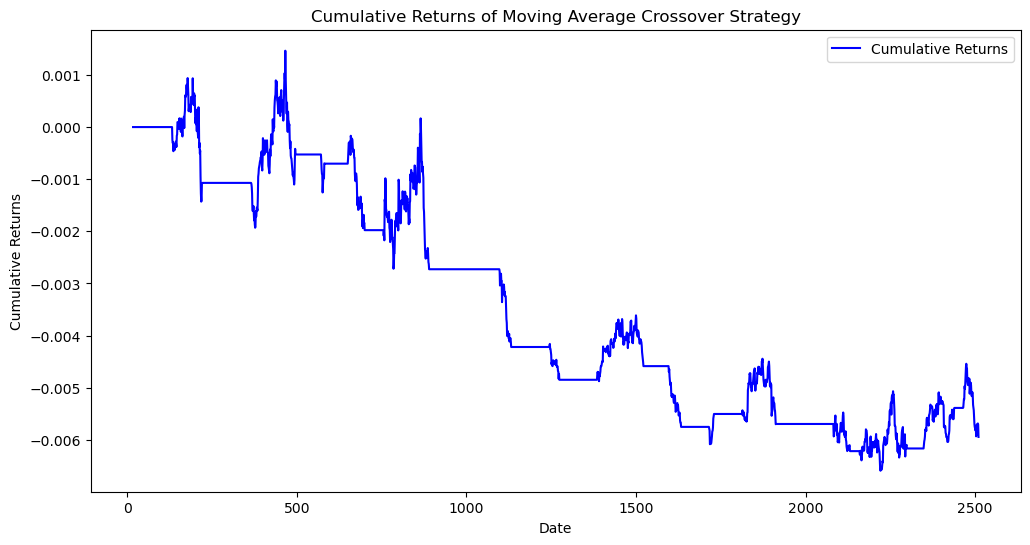

Sharpe Ratio: -0.3804244044525764


In [46]:
# Backtest the simple moving average crossover strategy
initial_capital = 100000.0
df['Holdings'] = df['Signal'] * df['Close']
df['Cash'] = initial_capital - (df['Position'] * df['Close']).cumsum()
df['Total'] = df['Holdings'] + df['Cash']
df['Returns'] = df['Total'].pct_change()

cumulative_returns = (df['Returns'] + 1).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='Cumulative Returns', color='blue')
plt.title('Cumulative Returns of Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Performance metrics
sharpe_ratio = df['Returns'].mean() / df['Returns'].std() * np.sqrt(252)
print(f'Sharpe Ratio: {sharpe_ratio}')

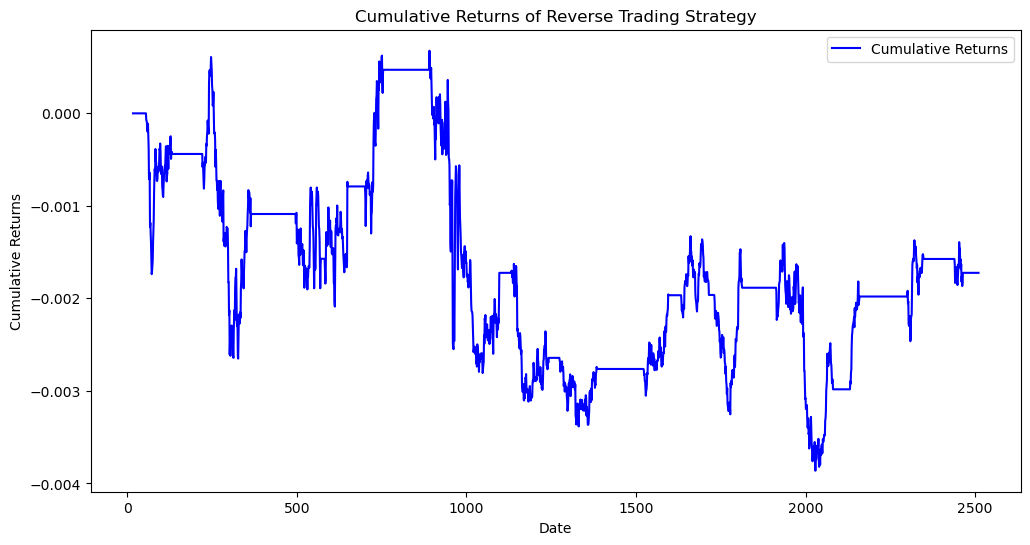

Reverse Sharpe Ratio: -0.10331278621532283


In [48]:
# Backtest the reverse trading strategy
df['Reverse_Holdings'] = df['Reverse_Signal'] * df['Close']
df['Reverse_Cash'] = initial_capital - (df['Reverse_Position'] * df['Close']).cumsum()
df['Reverse_Total'] = df['Reverse_Holdings'] + df['Reverse_Cash']
df['Reverse_Returns'] = df['Reverse_Total'].pct_change()

reverse_cumulative_returns = (df['Reverse_Returns'] + 1).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(reverse_cumulative_returns, label='Cumulative Returns', color='blue')
plt.title('Cumulative Returns of Reverse Trading Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Performance metrics
reverse_sharpe_ratio = df['Reverse_Returns'].mean() / df['Reverse_Returns'].std() * np.sqrt(252)
print(f'Reverse Sharpe Ratio: {reverse_sharpe_ratio}')

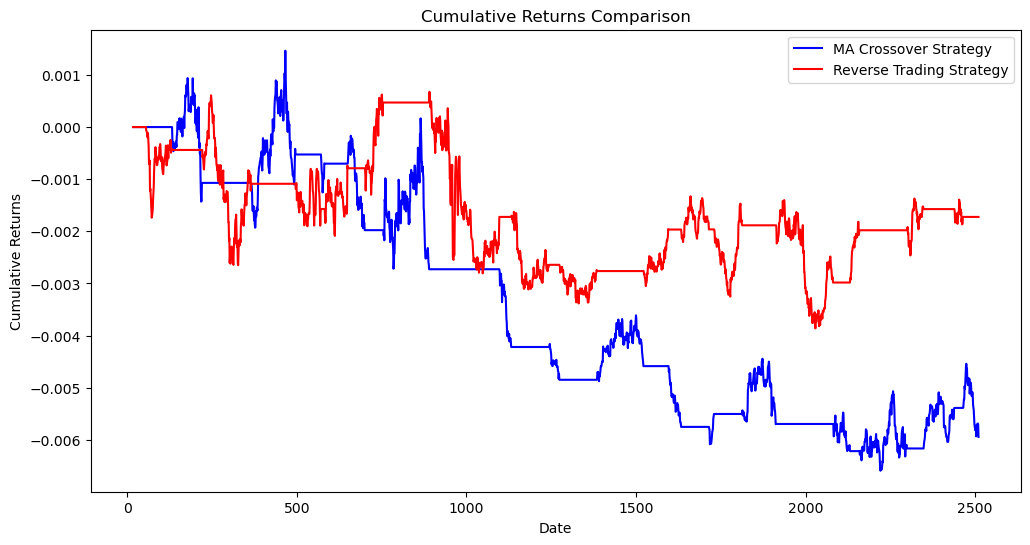

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='MA Crossover Strategy', color='blue')
plt.plot(reverse_cumulative_returns, label='Reverse Trading Strategy', color='red')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


In [50]:
# Maximum Drawdown
def max_drawdown(returns):
    cumulative = (returns + 1).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

max_drawdown_ma = max_drawdown(df['Returns'])
max_drawdown_reverse = max_drawdown(df['Reverse_Returns'])

print(f'Max Drawdown (MA Crossover): {max_drawdown_ma}')
print(f'Max Drawdown (Reverse Trading): {max_drawdown_reverse}')


Max Drawdown (MA Crossover): -0.008047210836125782
Max Drawdown (Reverse Trading): -0.004536928499407223


# 4. Market Sentiment Analysis:

In [54]:
# Load market events data
events_df = pd.read_csv('goldstock.csv', parse_dates=['Date'])
events_df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [63]:
!pip install vaderSentiment pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load gold price data (replace 'path_to_your_gold_price_dataset.csv' with the actual file path)
gold_df = pd.read_csv('path_to_your_gold_price_dataset.csv', parse_dates=['Date'])
gold_df.set_index('Date', inplace=True)

# Load market events data (replace 'path_to_market_events.csv' with the actual file path)
events_df = pd.read_csv('path_to_market_events.csv', parse_dates=['Date'])


ModuleNotFoundError: No module named 'vaderSentiment'